In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statistics

In [2]:
df=pd.read_csv('C:\\Users\\user\\Downloads\\Salary_Data(1).csv')

In [3]:
df.head()# extracting first five values

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape #it shows the number of rows and number of columns

(30, 2)

In [5]:
df.columns# it shows the columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
df.describe #total number of entries 

<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [8]:
df.isnull().sum() # it shows the values having no null values

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.dtypes #there are only two datatypes

YearsExperience    float64
Salary             float64
dtype: object

In [11]:
df.value_counts()  #there are no values are repeated (so its unique)

YearsExperience  Salary  
1.1              39343.0     1
1.3              46205.0     1
10.3             122391.0    1
9.6              112635.0    1
9.5              116969.0    1
9.0              105582.0    1
8.7              109431.0    1
8.2              113812.0    1
7.9              101302.0    1
7.1              98273.0     1
6.8              91738.0     1
6.0              93940.0     1
5.9              81363.0     1
5.3              83088.0     1
5.1              66029.0     1
4.9              67938.0     1
4.5              61111.0     1
4.1              57081.0     1
4.0              56957.0     1
                 55794.0     1
3.9              63218.0     1
3.7              57189.0     1
3.2              64445.0     1
                 54445.0     1
3.0              60150.0     1
2.9              56642.0     1
2.2              39891.0     1
2.0              43525.0     1
1.5              37731.0     1
10.5             121872.0    1
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

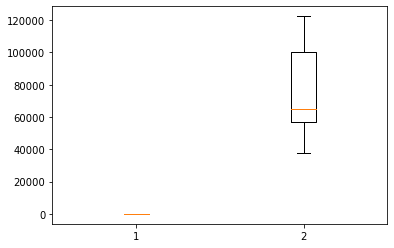

In [12]:
plt.boxplot(df) #the boxplot shows there are outliers in the data set
plt.show

(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

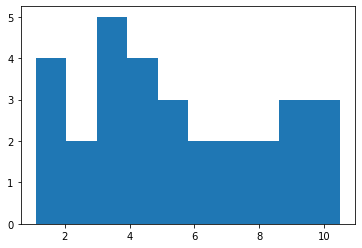

In [13]:
plt.hist(df['YearsExperience']) #so it is not following the bell shaped curve, so it not following normal distribution

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <BarContainer object of 10 artists>)

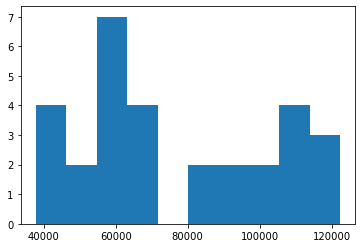

In [14]:
plt.hist(df['Salary']) #it is not following any bell shaped curve so the column is following under normal distribution

In [18]:
print('skewness',df['YearsExperience'].skew()) # skewness is not equal to zero so it is not normally distributed

skewness 0.37956024064804106


In [19]:
print('skewness',df['Salary'].skew())

skewness 0.35411967922959153


In [20]:
print('kurtosis',df['YearsExperience'].kurtosis())

kurtosis -1.0122119403325072


In [21]:
print('kurtosis',df['Salary'].kurtosis())

kurtosis -1.295421086394517


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

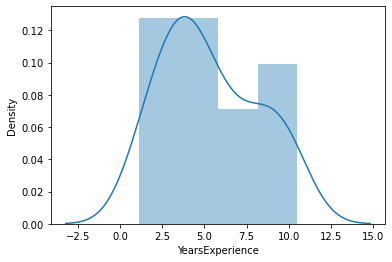

In [22]:
sns.distplot(df['YearsExperience'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

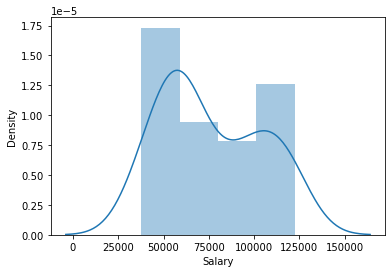

In [24]:
sns.distplot(df['Salary'])

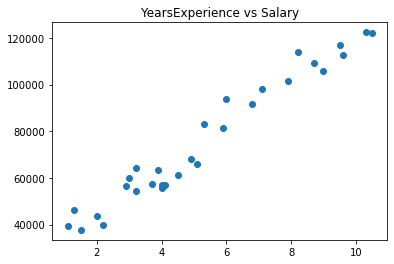

In [25]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.title('YearsExperience vs Salary')
plt.xlabel='YearsExperience'
plt.ylabel='Salary'

In [26]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


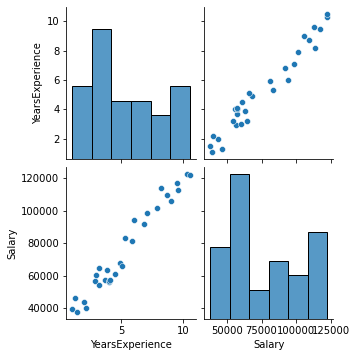

In [27]:
sns.pairplot(df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

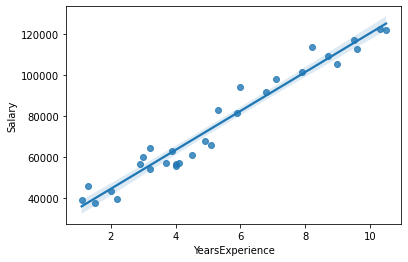

In [28]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [32]:
import statsmodels.formula.api as smf

In [33]:
model=smf.ols('YearsExperience~Salary',data=df).fit()

In [34]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [35]:
print('t-values''\n',model.tvalues,'\n','p-values''\n',model.pvalues)

t-values
 Intercept    -7.281283
Salary       24.950094
dtype: float64 
 p-values
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.14e-20
Time:                        16:30:48   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
df['SalarySQ']=df['Salary']**2
df['SalarySQ']

0     1.547872e+09
1     2.134902e+09
2     1.423628e+09
3     1.894426e+09
4     1.591292e+09
5     3.208316e+09
6     3.618022e+09
7     2.964258e+09
8     4.153158e+09
9     3.270582e+09
10    3.996516e+09
11    3.112970e+09
12    3.244100e+09
13    3.258241e+09
14    3.734554e+09
15    4.615572e+09
16    4.359829e+09
17    6.903616e+09
18    6.619938e+09
19    8.824724e+09
20    8.415861e+09
21    9.657583e+09
22    1.026210e+10
23    1.295317e+10
24    1.197514e+10
25    1.114756e+10
26    1.368175e+10
27    1.268664e+10
28    1.497956e+10
29    1.485278e+10
Name: SalarySQ, dtype: float64

In [40]:
model1=smf.ols('YearsExperience~SalarySQ',data=df).fit()

In [41]:
model1.params

Intercept    1.280243e+00
SalarySQ     6.201935e-10
dtype: float64

In [42]:
print('t-values''\n',model1.tvalues,'\n','p-values''\n',model1.pvalues)

t-values
 Intercept     5.885983
SalarySQ     22.352727
dtype: float64 
 p-values
 Intercept    2.488206e-06
SalarySQ     2.152535e-19
dtype: float64


In [43]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        YearsExperience   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     499.6
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           2.15e-19
Time:                        16:37:44   Log-Likelihood:                -29.308
No. Observations:                  30   AIC:                             62.62
Df Residuals:                      28   BIC:                             65.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2802      0.218      5.886      0.000       0.835       1.726
SalarySQ    6.202e-10   2.77e-11     22.353      0.000    5.63e-10    6.77e-10
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.067
Skew:                          -0.208   Prob(JB):                        0.587
Kurtosis:                       2.175   Cond. No.                     1.40e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='SalarySQ', ylabel='YearsExperience'>

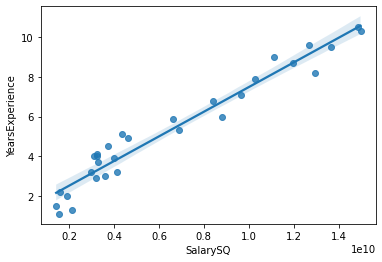

In [45]:
sns.regplot(x='SalarySQ',y='YearsExperience',data=df) #So as model1 is better than the model2 beacuse of some promising values of the AIC , lesser the AIC better the model will work.